##### IQR-based detection general method

An IQR-based detection is a statistical approach. This technique is applied for individual features, not for whole observations as in the Elliptic envelope. The intuition behind IQR-based detection is also very simple. First, we calculate the first quartile (Q1) and third quartile (Q3) of the data. Then we get the difference between those quartiles. That difference is called the IQR (InterQuartile Range).

IQR = Q3-Q1

Lower bound = Q1–1.5(IQR)

Upper bound = Q3+1.5(IQR)

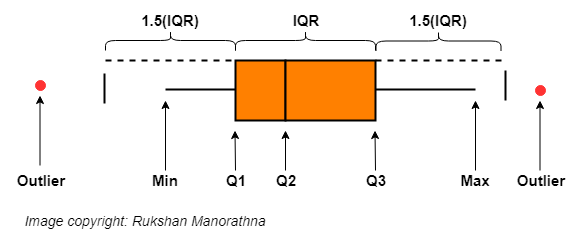

### Outlier detection Methods
Lets dive into Outlier detection methods

#### 1. Z-Score or Extreme Value Analysis (parametric)

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution.

 This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.
Some Python libraries like Scipy and Sci-kit Learn have easy to use functions and classes for a easy implementation along with Pandas and Numpy.

After making the appropriate transformations to the selected feature space of the dataset, the z-score of any data point can be calculated with the following expression:

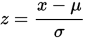

When computing the z-score for each sample on the data set a threshold must be specified. Some good ‘thumb-rule’ thresholds can be: 2.5, 3, 3.5 or more standard deviations.

In [ ]:
# import numpy
import numpy as np

# random data points to calculate z-score

data = [4, 6, 7, -100, 5, 8, 6, 5, 4, 5, 99, 98, 6, 7, 5]

# calculate mean
mean = np.mean(data) 

# calculate standard deviation
sd = np.std(data)

# determine a threhold means beyond how many standard deviation
threshold = 2

# create empty list to store outliers
outliers = []

# detect outlier
for i in data: 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:  # identify outliers
        outliers.append(i) # add to the empty list
# print outliers    
print("The detected outliers are: ", outliers)

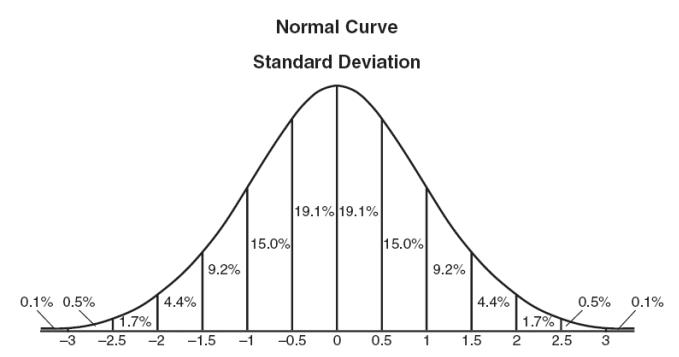

By ‘tagging’ or removing the data points that lay beyond a given threshold we are classifying data into outliers and not outliers.  For nonparametric problems Dbscan and Isolation Forests can be good solutions

**Z-Score pros:**
It is a very effective method if you can describe the values in the feature space with a gaussian distribution. (Parametric)
The implementation is very easy using pandas and scipy.stats libraries.

:**Z-Score cons::**
It is only convenient to use in a low dimensional feature space, in a small to medium sized dataset.
Is not recommended when distributions can not be assumed to be parametric.

#### 2. DBSCAN Algorithm for Fraud Detection & Outlier Detection in a Data set



The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: ***epsilon*** and ***minPoints***. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.

DBSCAN creates a circle of epsilon radius around every data point and classifies them into ***Core point***, ***Border point***, and ***Noise***. **A data point is a Core point if the circle around it contains at least ‘minPoints’ number of points*. *If the number of points is less than minPoints, then it is classified as Border Point, and if there are no other data points around any data point within epsilon radius, then it treated as Noise**.


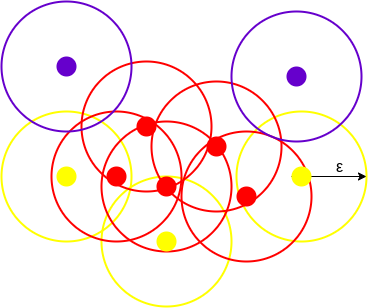

The above figure shows us a cluster created by DBCAN with minPoints = 3. Here, we draw a circle of equal radius epsilon around every data point. These two parameters help in creating spatial clusters.

All the data points with at least 3 points in the circle including itself are considered as Core points represented by red color. 

All the data points with less than 3 but greater than 1 point in the circle including itself are considered as Border points. They are represented by yellow color. 

Finally, data points with no point other than itself present inside the circle are considered as Noise represented by the purple color.

For locating data points in space, DBSCAN uses Euclidean distance, although other methods can also be used (like great circle distance for geographical data). It also needs to scan through the entire dataset once, whereas in other algorithms we have to do it multiple times.

**Dbscan pros:**

It is a super effective method when the distribution of values in the feature space can not be assumed.
Works well if the feature space for searching outliers is multidimensional (ie. 3 or more dimensions)
Sci-kit learn’s implementation is easy to use and the documentation is superb.
Visualizing the results is easy and the method itself is very intuitive.

**Dbscan cons:**
The values in the feature space need to be scaled accordingly.
Selecting the optimal parameters eps, MinPts and metric can be difficult since it is very sensitive to any of the three params.
It is an unsupervised model and needs to be re-calibrated each time a new batch of data is analyzed.
It can predict once calibrated but is strongly not recommended.

In [ ]:
# data wrangling
import pandas as pd# visualization
import matplotlib.pyplot as plt# algorithm
from sklearn.cluster import DBSCAN

In [ ]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
print(df.head())

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[["sepal_length", "sepal_width"]])

In [ ]:
model

In [ ]:
# visualize outputs
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(df[["sepal_length", "sepal_width"]])
distances, indices = nbrs.kneighbors(df[["sepal_length", "sepal_width"]])

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
# input data
data = df[["sepal_length", "sepal_width"]]# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)

The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0 is a good cluster, and -1 is the noise. Let’s plot the results and see what we get.

In [ ]:
# visualize outputs
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)

In [ ]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)

#### 3.Isolation Forests

Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. 
This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.
Then for prediction, it compares an observation against that splitting value in a “node”, that node will have two node children on which another random comparisons will be made. The number of “splittings” made by the algorithm for an instance is named: “path length”. As expected, outliers will have shorter path lengths than the rest of the observations.

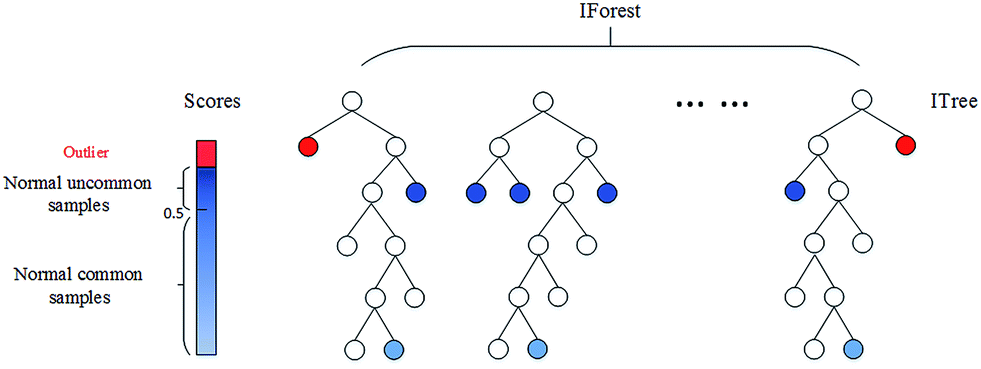

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

The most important hyperparameter in the Isolation Forest algorithm is the contamination hyperparameter — a value we don’t know. It represents the proportion of outliers in the dataset. The values of this hyperparameter are ranging from 0 to 0.5. If we believe that there will be many outliers in our data, we can set contamination to a larger value. Not knowing the exact proportion of outliers in the dataset is the major limitation of using this method.

An outlier score can computed for each observation:

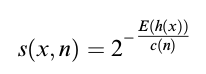

Where h(x) is the path length of the sample x, and c(n) is the ‘unsuccessful length search’ of a binary tree (the maximum path length of a binary tree from root to external node) n is the number of external nodes. After giving each observation a score ranging from 0 to 1; 1 meaning more outlyingness and 0 meaning more normality. A threshold can be specified (ie. 0.55 or 0.60).

**Isolation Forest pros:**
There is no need of scaling the values in the feature space.
It is an effective method when value distributions can not be assumed.
It has few parameters, this makes this method fairly robust and easy to optimize.
Scikit-Learn’s implementation is easy to use and the documentation is superb.

**Isolation Forest cons:**
The Python implementation exists only in the development version of Sklearn.
Visualizing results is complicated.
If not correctly optimized, training time can be very long and computationally expensive.

#### 4. Probabilistic and Statistical Modeling (parametric)

**commonly used in statistics for the detection of univariate outliers:**

** a)Tukey’s box plot method**

Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

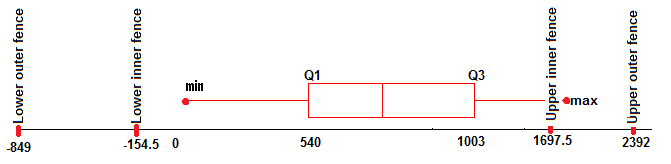

Example of a box plot including the inner and outer fences and minimum and maximum observations (known as whiskers). 

Image by Stephanie Glen on statisticsHowTo.com


IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile

Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]

Outer fence = [Q1–3*IQR, Q3+3*IQR]

The distribution’s inner fence is defined as 1.5 x IQR below Q1, and 1.5 x IQR above Q3. 

The outer fence is defined as 3 x IQR below Q1, and 3 x IQR above Q3. 

Following Tukey, only the probable outliers are treated, which lie outside the outer fence

**Advantages of Tukey's method**
The great advantage of Tukey’s box plot method is that the statistics (e.g. IQR, inner and outer fence) are robust to outliers, meaning to find one outlier is independent of all other outliers. 

Also, the statistics are easy to calculate. 

Furthermore, this method does not require a normal distribution of the data, which is often not guaranteed in real-life settings. If a distribution is highly skewed (usually found in real-life data), the Tukey method can be extended to the log-IQ method. Here, each value is transformed to its logarithm before calculating the inner and outer fences.

**b) Median Absolute Deviation method**

The median absolute deviation method (MAD) replaces the mean and standard deviation with more robust statistics, like the median and median absolute deviation. The median absolute deviation is defined as:


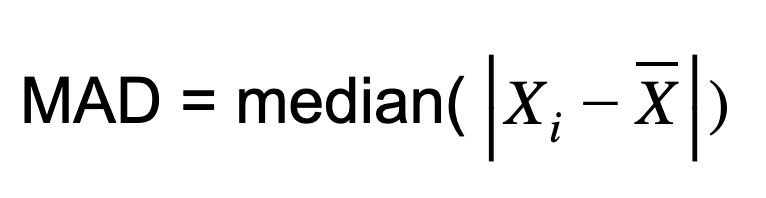


The test statistic is calculated like the z-score using robust statistics. Also, to identify outlying observations, the cut-off point of 3 is used. If the test statistic lies above 3, it is marked as an outlier. Compared z-score, this method is more robust to outliers and does assume X to be parametrically distributed (Examples of discrete and continuous parametric distributions).



#### 5. Outlier Detection by Simple Statistics with ECOD

A new and better alternative is ECOD, an abbreviation of “empirical cumulative distribution functions for outlier detection”. The paper was published in 2021.

It has several key features that make it stand out from competing algorithms:

No hyperparameters! This is important because is difficult to tune hyperparameters for outlier detection because the true labels are rare, unknown, or difficult to obtain.

Fast and computationally efficient. The time complexity scales linearly with dataset size and number of dimensions.

Easy to understand and interpretable.


This article contains two sections:
    
A Description of ECOD algorithm works: introduction, intuition, and the algorithm itself. Further, I propose how a 
practitioner or domain expert might hand-select thresholds for a particular application.

A tutorial of how to use ECOD in python.

##### The ECOD Algorithm

*ECOD uses information about the distribution of the data to determine where data is less likely (low-density) and thus more outlierly*. 

Specifically, ECOD estimates a empirical cumulative distribution function (ECDF) for each variable the data separately. To generate an outlier score for an observation, ECOD computes the tail probability for each variable using the univariate ECDFs and multiplies them together. This calculation is done in log space, accounting for both left and right tails of each dimension.

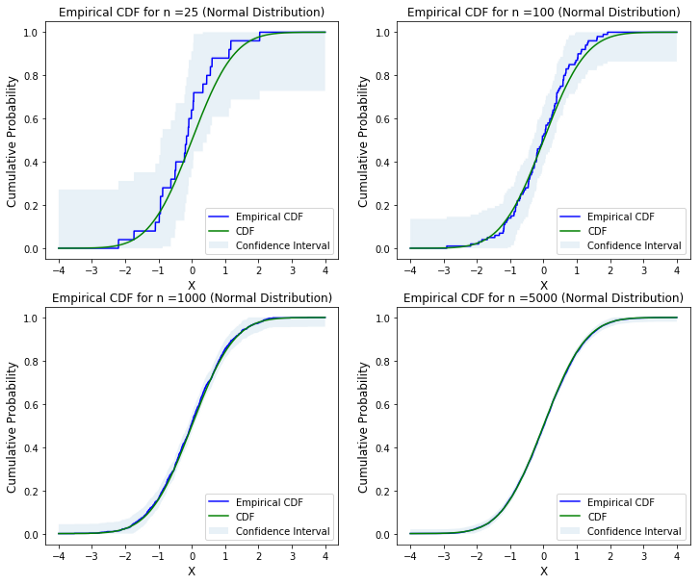

The empirical cumulative distribution function is an estimate of the underlying cumulative distribution function (CDF) that generated the points in the sample. The CDF of a random variable is the probability that a variable will take a value less than or equal to X (Wikipedia). Image source: Wikimedia

#### ECOD Intuition
As an intuitive starting point, if you built a histogram of the data, capturing information about the distribution of the data, then you could use bins with low counts to determine where outliers are. 
The plots below illustrate this idea.

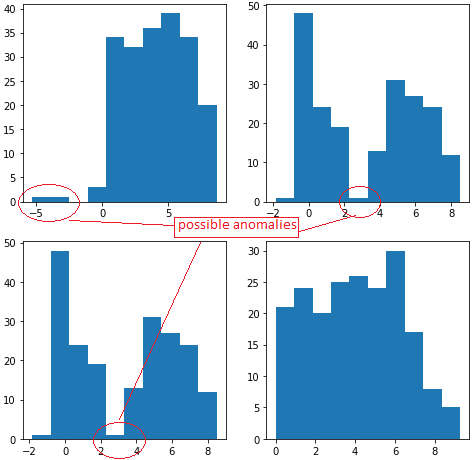

Four randomly generated distributions. Three of the samples have bins with low counts. Points falling into these bins could be considered outliers.


Unfortunately, this approach using histograms to identify outlying points includes hyperparameters that must be selected: how to bin the data for histogram construction.

Here is the general idea: outliers are points that occur in low density parts of the probability distribution. If the distribution is unimodal (aka has only one peak), then the rare items are located in the tails of the distribution. (Two of the distributions above are unimodal).

ECOD makes this concept concrete. For each observation, ECOD scores outliers according to the probability of observing a point at least as “extreme” as the given observation, in terms of tail probabilitie.

##### Fitting ECOD
The algorithm to fit ECOD is quite simple. For each variable in the training dataset:

Estimate the left tail univariate ECDF for the variable

Estimate the right tail univariate ECDF for the variable

Compute sample skewness coefficient for the variable's distribution

Because the fit is a for-loop, it can be parallelized for faster fitting. Remember that the ECDF functions are used to calculate the probability of a value appearing in the fitted distribution.

### 6. Machine learning techniques for outlier detection in Python

#### 6.A Elliptic Envelope Algorithm

The intuition behind the Elliptic Envelope is very simple. We draw an ellipse around the data points based on some criteria and classify any data point inside the ellipse as an inlier (green ones) and any observation outside the ellipse as an outlier (red ones).

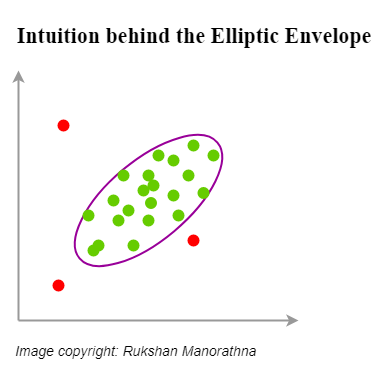
                                                Elliptic Envelope Algorithm
                                                


The Elliptic Envelope method considers all observations as a whole, not individual features. Although the intuition behind this method is very simple, the implementation is somewhat tricky. In Scikit-learn, the Elliptic Envelope method is implemented by EllipticEnvelope() function. There, we need to specify the contamination hyperparameter — a value we don’t know. It represents the proportion of outliers in the dataset. The values of this hyperparameter are ranging from 0 to 0.5 (default is 0.1). If we believe that there will be many outliers in our data, we can set contamination to a larger value. Not knowing the exact proportion of outliers in the dataset is the major limitation of using this method.

#### 6.B One-Class SVM Algorithm

One-class SVM (One-class Support Vector Machines) is an unsupervised machine learning algorithm that can be used for novelty detection. It is very sensitive to outliers. Therefore, it is not very good for outlier detection, but the best option for novelty detection when the training data is not much polluted with outliers. This algorithm can be applied to high-dimensional data sets and there is no underlying assumption in the distribution of the data.

#### Intuition
One-class SVM is based on SVM. An SVM uses a hyperplane to separate two classes while a One-class SVM uses a hypersphere to encompass all of the observations.
#### Implementation
Since One-class SVM is not very good for outlier detection, here we use it for novelty detection.


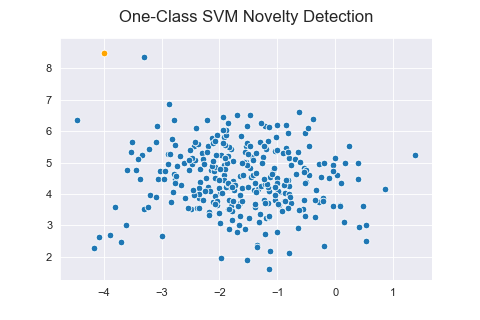

#### 6.C Local Outlier Factor (LOF) Algorithm

Local Outlier Factor (LOF) is an unsupervised machine learning algorithm that was originally created for outlier detection, but now it can also be used for novelty detection. It works well on high-dimensional datasets.

#### Intuition
Here is what Scikit-learn official documentation says about the intuition of the Local Outlier Factor algorithm.
The Local Outlier Factor (LOF) algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbours. It considers as outliers the samples that have a substantially lower density than their neighbours.


#### Implementation

The implementation of this technique is significantly different between outlier detection and novelty detection. Let’s discuss that difference first.

#### In outlier detection
When applying this technique for outlier detection, there is no predict() method, but only a fit_predict() method which should be used with the training data (X).

##### In novelty detection
If you want to use the Local Outlier Factor for novelty detection (i.e. finding whether a new unseen observation is an outlier or not), you should set the novelty hyperparameter to True (the default is False). When applying this technique for novelty detection, the fit() and predict() methods are available. The fit() method should be used with the training data (X) and the predict() method should be used on new unseen data, not on the training data (X).

LOF where the difference between outlier detection and novelty detection comes into play.

LOF where the difference between outlier detection and novelty detection comes into play.

The Elliptic Envelope should only be used with data that satisfy the assumption of normality.

The One-class SVM is not very good for outlier detection, but the best option for novelty detection when the training data is not much polluted with outliers.

The most important hyperparameter in the Elliptic Envelope, Isolation Forest and LOF is the contamination hyperparameter. 

It represents the proportion of outliers in the dataset. In most cases, we do not know the exact value for the contamination hyperparameter. The best way to guess the value is that first do IQR-based detection and count the number of outliers in the dataset. As you know the total of observations, you can get an approximate value for the proportion of outliers. This is the value for the contamination hyperparameter!

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
### 5. Interquartile Range Method

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. Recall that percentiles can be calculated by sorting the observations and selecting values at specific indices.
The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. 

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or far outs when described in the context of box and whisker plots. On a box
and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots. We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between
the 75th and 25th percentiles.

In [ ]:
from numpy import percentile
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))